In [3]:
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go

In [4]:
df_carrossel = pd.read_csv('df_carrossel.csv', sep=',')

df_post_unico = pd.read_csv('df_post_unico.csv',sep=',')

df_video = pd.read_csv('df_video.csv',sep=',')

In [14]:
df_post_unico

link_permanente   tipo_de_publicação  impressões  \
0   https://www.instagram.com/p/CYUkhXqIaug/  Imagem do Instagram       32603   
1   https://www.instagram.com/p/CYe6S3uLaVl/  Imagem do Instagram       28463   
2   https://www.instagram.com/p/CYoogjtrqnB/  Imagem do Instagram       11571   
3   https://www.instagram.com/p/CYw7zzErc_n/  Imagem do Instagram       17914   
4   https://www.instagram.com/p/CYzUoVGIf1J/  Imagem do Instagram       29604   
..                                       ...                  ...         ...   
90  https://www.instagram.com/p/Cp5K9k7uCEd/  Imagem do Instagram       19583   
91  https://www.instagram.com/p/CqGpRJQufVC/  Imagem do Instagram       11418   
92  https://www.instagram.com/p/CqLSMuBoHIm/  Imagem do Instagram       13506   
93  https://www.instagram.com/p/CqYq1PNvPUR/  Imagem do Instagram       19543   
94  https://www.instagram.com/p/Cqd7SLmPWc7/  Imagem do Instagram       10503   

    alcance  compartilhamentos  seguimentos  curtidas  comentários  \
0     30742                433            4      1337          155   
1     26410                 66           18      1025           19   
2     10575                  9            2       415            8   
3     16186                 48            2       815            1   
4     28046                368           12      2490           30   
..      ...                ...          ...       ...          ...   
90    17937                 30            1       724          738   
91    10455                 67            0       676            3   
92    12599                 60            0       820            4   
93    18265                585           31      1995           36   
94     9541                 40            0       502            1   

    salvamentos        data horario  
0            60  2022-01-04   12:01  
1            78  2022-01-08   12:01  
2            10  2022-01-12   07:01  
3            67  2022-01-15   12:01  
4           139  2022-01-16   11:01  
..          ...         ...     ...  
90           13  2023-03-17   07:03  
91           60  2023-03-22   13:03  
92          103  2023-03-24   08:03  
93          276  2023-03-29   13:03  
94           71  2023-03-31   14:03  

[95 rows x 11 columns]

In [5]:
df = pd.read_csv('dados_tratados.csv', sep=',')

In [6]:
df.columns

Index(['link_permanente', 'tipo_de_publicação', 'impressões', 'alcance',
       'compartilhamentos', 'seguimentos', 'curtidas', 'comentários',
       'salvamentos', 'data', 'horario'],
      dtype='object')

## Matriz de Correlação 

In [206]:
df[['impressões','alcance','compartilhamentos','seguimentos','curtidas','comentários','salvamentos']].corr().round(2)

impressões  alcance  compartilhamentos  seguimentos  \
impressões               1.00     0.98               0.73         0.63   
alcance                  0.98     1.00               0.66         0.61   
compartilhamentos        0.73     0.66               1.00         0.56   
seguimentos              0.63     0.61               0.56         1.00   
curtidas                 0.89     0.87               0.83         0.58   
comentários              0.25     0.27               0.18         0.14   
salvamentos              0.69     0.67               0.48         0.65   

                   curtidas  comentários  salvamentos  
impressões             0.89         0.25         0.69  
alcance                0.87         0.27         0.67  
compartilhamentos      0.83         0.18         0.48  
seguimentos            0.58         0.14         0.65  
curtidas               1.00         0.19         0.60  
comentários            0.19         1.00         0.08  
salvamentos            0.60         0.08         1.00

## Medidas Descritivas 

In [207]:
df.describe().round(2)

impressões   alcance  compartilhamentos  seguimentos  curtidas  \
count      521.00    521.00             521.00       521.00    521.00   
mean     23252.68  19082.48             367.77        23.23   1268.37   
std      15771.09  12589.17             640.85        52.19   1253.63   
min       3519.00   2815.00               0.00         0.00     27.00   
25%      10983.00   9243.00              33.00         2.00    369.00   
50%      19213.00  16113.00             123.00         8.00    827.00   
75%      32397.00  26903.00             379.00        22.00   1748.00   
max     103140.00  87576.00            5214.00       688.00   7376.00   

       comentários  salvamentos  
count       521.00       521.00  
mean         19.17       186.68  
std          55.43       303.92  
min           0.00         0.00  
25%           2.00        31.00  
50%           7.00        94.00  
75%          18.00       216.00  
max         738.00      3316.00

# Dispersão


## Função Anotação 

In [11]:
def adicionar_anotacoes(fig, df, x_column, y_column, text_list):
    for i, text in enumerate(text_list):
        x = df.sort_values(y_column, ascending=False).iloc[i][x_column]
        y = df.sort_values(y_column, ascending=False).iloc[i][y_column]
        fig.add_annotation(x=x, y=y, text=text, showarrow=True, font=dict(size=8, color='black'))


## Dispersão Alcance 

In [7]:
df.sort_values('alcance', ascending=False).head(20)

link_permanente      tipo_de_publicação  \
404     https://www.instagram.com/p/Cm6lRXjs1Iv/  Carrossel do Instagram   
481  https://www.instagram.com/reel/CpV6xY7Dzcw/      Vídeo do Instagram   
383  https://www.instagram.com/reel/CmfM8M9Kz05/      Vídeo do Instagram   
393     https://www.instagram.com/p/CjgaSc4uSrE/  Carrossel do Instagram   
201     https://www.instagram.com/p/Cg2m85fhTej/     Imagem do Instagram   
420     https://www.instagram.com/p/CnXtrgTuc-r/     Imagem do Instagram   
262     https://www.instagram.com/p/Ci-5kKrueYj/  Carrossel do Instagram   
307     https://www.instagram.com/p/CktDxvTuGrk/  Carrossel do Instagram   
485     https://www.instagram.com/p/CpgINg2OdGT/  Carrossel do Instagram   
196     https://www.instagram.com/p/CgrZhiCACDL/  Carrossel do Instagram   
237     https://www.instagram.com/p/CiC6nmOvP6q/  Carrossel do Instagram   
105     https://www.instagram.com/p/CePP7Vusy8q/  Carrossel do Instagram   
252     https://www.instagram.com/p/CigMyb-PqQx/  Carrossel do Instagram   
149  https://www.instagram.com/reel/CfXQi6mjpl1/      Vídeo do Instagram   
91      https://www.instagram.com/p/Cdy6ErjByn3/  Carrossel do Instagram   
451     https://www.instagram.com/p/CoX7KxZsp1d/  Carrossel do Instagram   
498  https://www.instagram.com/reel/Cp3TZyRD6tM/      Vídeo do Instagram   
464  https://www.instagram.com/reel/Co2LlTEjTYX/      Vídeo do Instagram   
135     https://www.instagram.com/p/CfCoG1kvcpH/  Carrossel do Instagram   
217     https://www.instagram.com/p/ChalKb9rj_i/     Imagem do Instagram   

     impressões  alcance  compartilhamentos  seguimentos  curtidas  \
404      103140    87576               1225          688      3992   
481       69757    66813                545           24      2852   
383       68110    63949               1031          253      3865   
393       72948    57917               3030          379      6240   
201       63040    56945               1954          118      4788   
420       58152    56367               1199           19      4037   
262       66188    56137                824          136      4134   
307       67371    52409               2529           83      2672   
485       71217    52310               1951           42      4799   
196       67333    51307               4305          169      7376   
237       66918    50788               1804           74      3380   
105       68723    50080               1857          228      4322   
252       65004    49963               1777          138      4081   
149       53464    48451                699           30      2456   
91        65077    46966               1564          445      5478   
451       58253    46363                611           63      3737   
498       52728    46191                731           11      3201   
464       49362    45885                696            4      2614   
135       56088    45795               4007          222      5440   
217       50745    45750               1753           39      2150   

     comentários  salvamentos        data horario  
404           26         2087  2023-01-02   06:01  
481           40          283  2023-03-03   13:03  
383           28         1497  2022-12-22   14:12  
393           26          825  2022-10-09   13:10  
201           66         1034  2022-08-04   14:08  
420           22           81  2023-01-13   13:01  
262           59          578  2022-09-26   13:09  
307          398          335  2022-11-08   06:11  
485           52         1193  2023-03-07   13:03  
196           31          678  2022-07-31   06:07  
237           40         1099  2022-09-03   06:09  
105           54         3316  2022-05-31   14:05  
252           98          442  2022-09-14   15:09  
149           36          860  2022-06-28   14:06  
91            31         1657  2022-05-20   14:05  
451           41          421  2023-02-07   12:02  
498           43         1943  2023-03-16   14:03  
464           46         1377

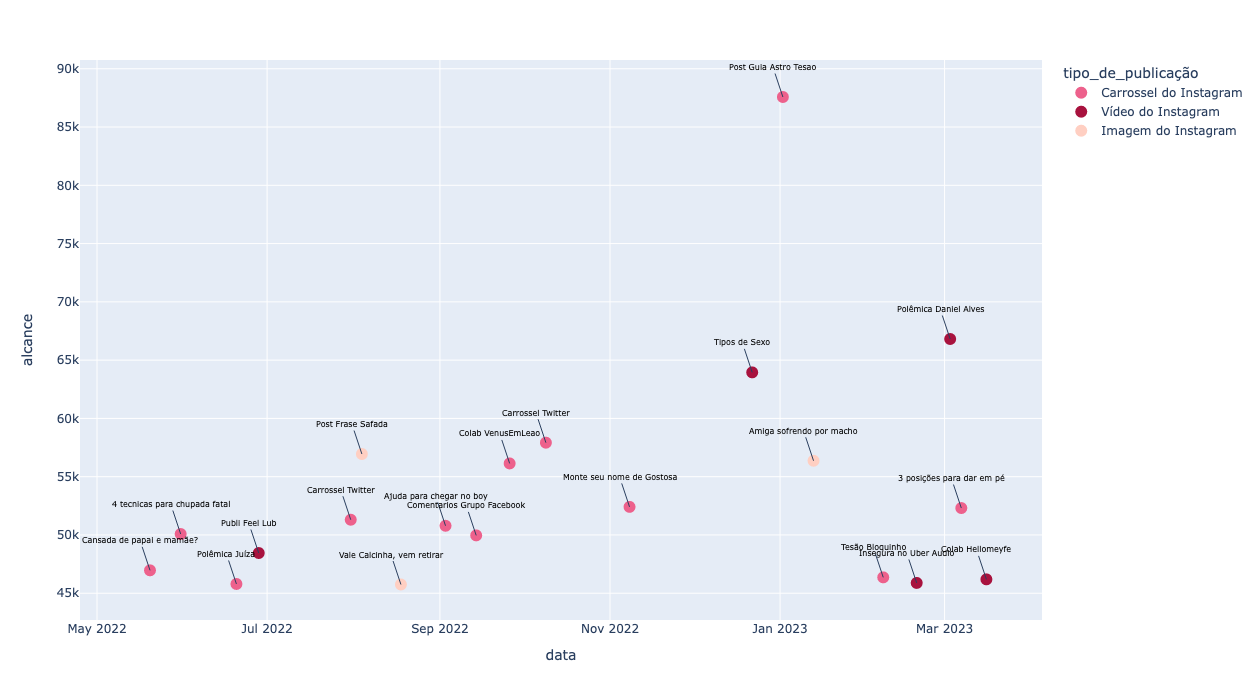

In [12]:

cores = ['#ED618C', '#A8123E', '#FFCFC2']


fig = px.scatter(df.sort_values('alcance', ascending=False).head(20),
                 x='data',
                 y='alcance',
                 width=1250,
                 height=700,
                 color='tipo_de_publicação',
                 color_discrete_sequence=cores)




fig.update_traces(mode='markers', marker=dict(size=12))


textos = ['Post Guia Astro Tesao', 'Polêmica Daniel Alves', 'Tipos de Sexo', 'Carrossel Twitter', 'Post Frase Safada',
          'Amiga sofrendo por macho', 'Colab VenusEmLeao', 'Monte seu nome de Gostosa', '3 posições para dar em pé',
          'Carrossel Twitter', 'Ajuda para chegar no boy', '4 tecnicas para chupada fatal', 'Comentarios Grupo Facebook',
          'Publi Feel Lub', 'Cansada de papai e mamãe?', 'Tesão Bloquinho', 'Colab Hellomeyfe', 'Insegura no Uber Audio',
          'Polêmica Juíza', 'Vale Calcinha, vem retirar']


adicionar_anotacoes(fig, df, 'data', 'alcance', textos)

fig.show()


## Dispersão Curtidas 

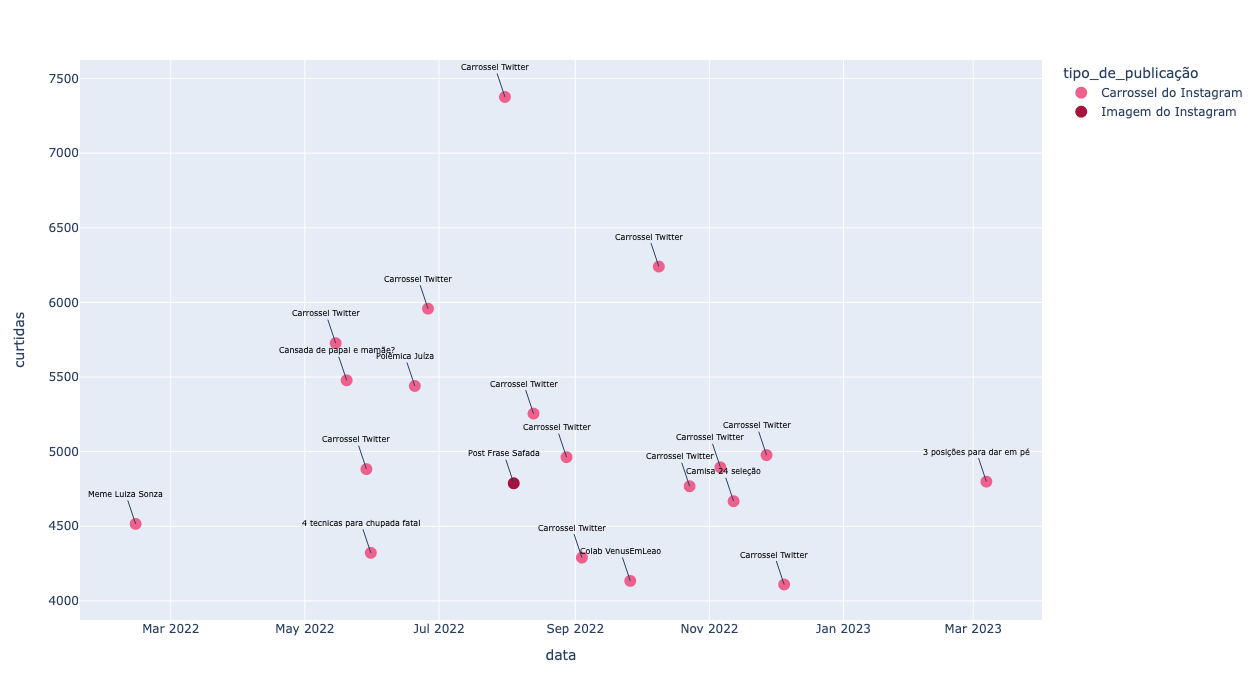

In [210]:

cores = ['#ED618C', '#A8123E', '#FFCFC2']

# Criar o gráfico de dispersão com as cores definidas
fig = px.scatter(df.sort_values('curtidas', ascending=False).head(20),
                 x='data',
                 y='curtidas',
                 width=1250,
                 height=700,
                 color='tipo_de_publicação',
                 color_discrete_sequence=cores)

fig.update_traces(mode='markers', marker=dict(size=12))

# Definir a lista de textos para as anotações
textos = ['Carrossel Twitter','Carrossel Twitter', 'Carrossel Twitter', 'Carrossel Twitter', 'Cansada de papai e mamãe?','Polêmica Juíza', 
          'Carrossel Twitter', 'Carrossel Twitter', 'Carrossel Twitter', 'Carrossel Twitter','Carrossel Twitter', '3 posições para dar em pé',
          'Post Frase Safada', 'Carrossel Twitter', 'Camisa 24 seleção', 'Meme Luiza Sonza', '4 tecnicas para chupada fatal','Carrossel Twitter',
          'Colab VenusEmLeao', 'Carrossel Twitter']

# Chamar a função para adicionar as anotações
adicionar_anotacoes(fig, df, 'data', 'curtidas', textos)

# Exibir o gráfico
fig.show()


## Dispersão Compartilhamentos

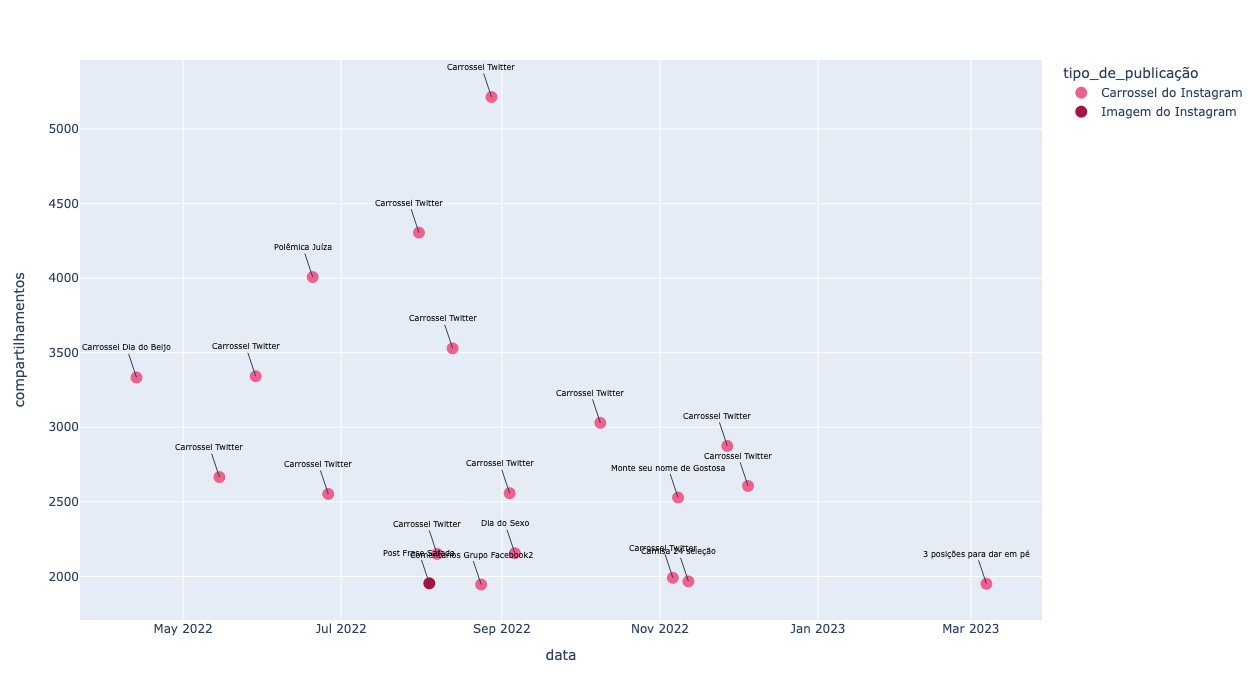

In [211]:

cores = ['#ED618C', '#A8123E', '#FFCFC2']


fig = px.scatter(df.sort_values('compartilhamentos', ascending=False).head(20),
                 x='data',
                 y='compartilhamentos',
                 width=1250,
                 height=700,
                 color='tipo_de_publicação',
                 color_discrete_sequence=cores)

fig.update_traces(mode='markers', marker=dict(size=12))


textos = ['Carrossel Twitter','Carrossel Twitter', 'Polêmica Juíza', 'Carrossel Twitter', 'Carrossel Twitter', 'Carrossel Dia do Beijo', 
          'Carrossel Twitter', 'Carrossel Twitter', 'Carrossel Twitter', 'Carrossel Twitter', 'Carrossel Twitter','Carrossel Twitter', 
          'Monte seu nome de Gostosa', 'Dia do Sexo', 'Carrossel Twitter', 'Carrossel Twitter', 'Camisa 24 seleção','Post Frase Safada',
          '3 posições para dar em pé','Comentarios Grupo Facebook2']


adicionar_anotacoes(fig, df, 'data', 'compartilhamentos', textos)


fig.show()


## Dispersão Alcance por categoria de post 

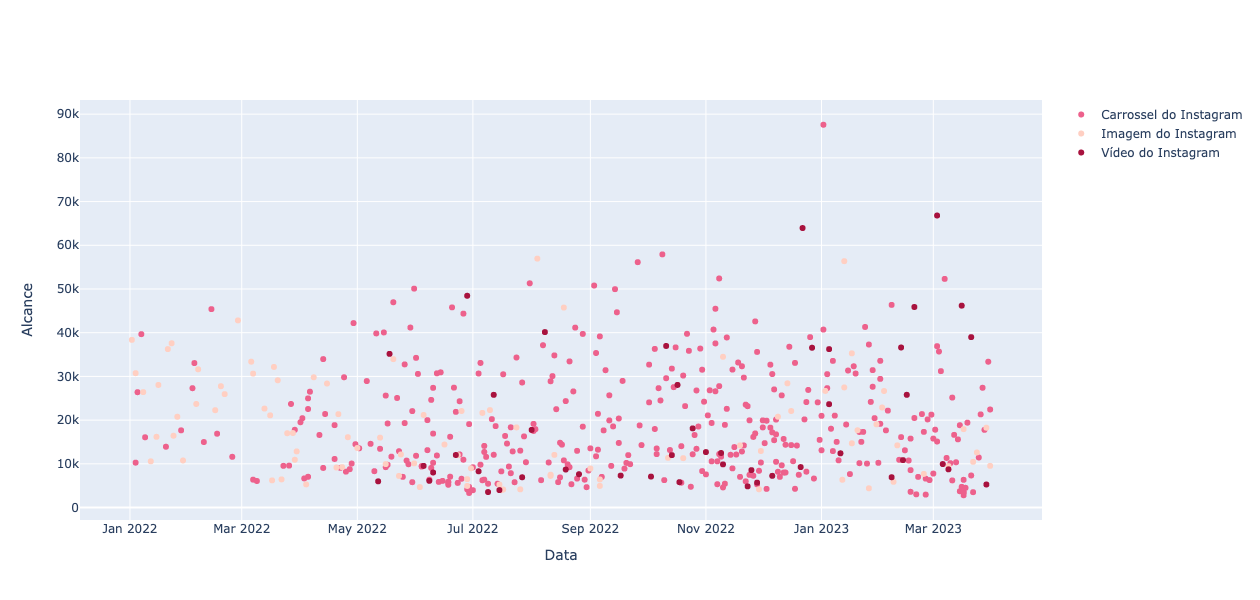

In [212]:
color_map = {
    'Carrossel do Instagram': '#ED618C',
    'Imagem do Instagram': '#FFCFC2',
    'Vídeo do Instagram': '#A8123E'
}

fig = go.Figure()

for category, color in color_map.items():
    filtered_data = df[df['tipo_de_publicação'] == category]
    fig.add_trace(go.Scatter(
        x=filtered_data['data'],
        y=filtered_data['alcance'],
        mode='markers',
        marker=dict(color=color),
        name=category
    ))

fig.update_layout(
    width=1000,
    height=600,
    xaxis_title='Data',
    yaxis_title='Alcance'
)

fig.show()

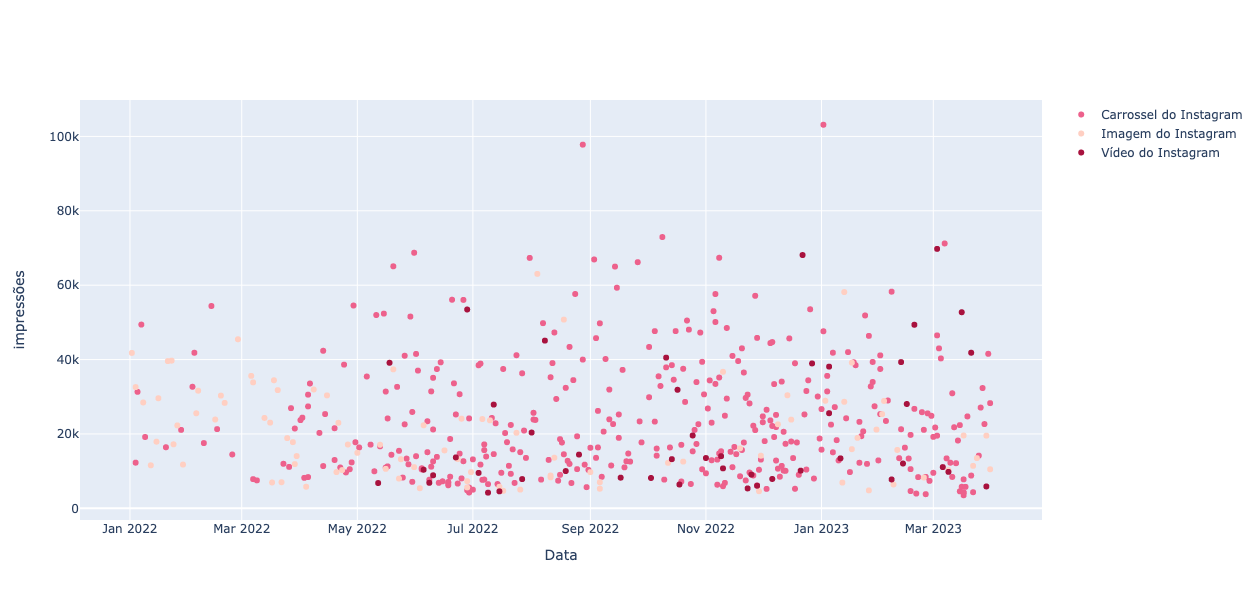

In [213]:
color_map = {
    'Carrossel do Instagram': '#ED618C',
    'Imagem do Instagram': '#FFCFC2',
    'Vídeo do Instagram': '#A8123E'
}

fig = go.Figure()

for category, color in color_map.items():
    filtered_data = df[df['tipo_de_publicação'] == category]
    fig.add_trace(go.Scatter(
        x=filtered_data['data'],
        y=filtered_data['impressões'],
        mode='markers',
        marker=dict(color=color),
        name=category
    ))

fig.update_layout(
    width=1000,
    height=600,
    xaxis_title='Data',
    yaxis_title='impressões'
)

fig.show()

## Dispersão curtidas

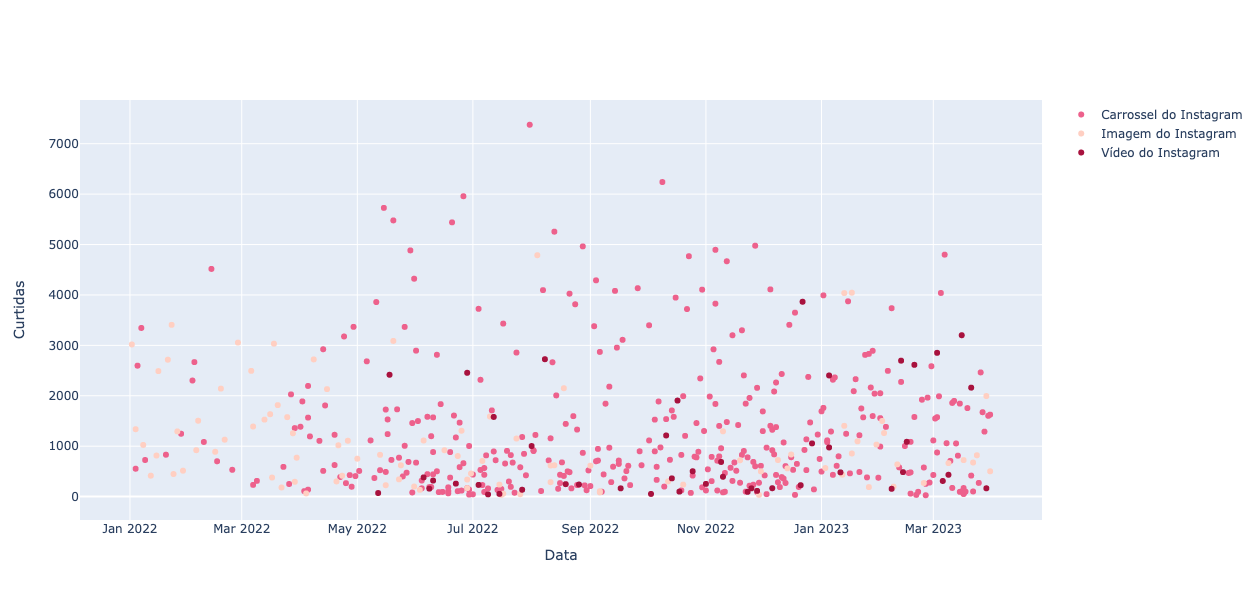

In [214]:
color_map = {
    'Carrossel do Instagram': '#ED618C',
    'Imagem do Instagram': '#FFCFC2',
    'Vídeo do Instagram': '#A8123E'
}

fig = go.Figure()

for category, color in color_map.items():
    filtered_data = df[df['tipo_de_publicação'] == category]
    fig.add_trace(go.Scatter(
        x=filtered_data['data'],
        y=filtered_data['curtidas'],
        mode='markers',
        marker=dict(color=color),
        name=category
    ))

fig.update_layout(
    width=1000,
    height=600,
    xaxis_title='Data',
    yaxis_title='Curtidas'
)

fig.show()

## Média e Desvio padrão por Alcance

In [215]:
df_aux = df[['tipo_de_publicação', 'alcance']].groupby('tipo_de_publicação').agg({'alcance':['mean','std']}).round()

df_aux.columns = ['alcance médio', 'Desvio padrão']

df_aux = df_aux.reset_index()

df_aux

tipo_de_publicação  alcance médio  Desvio padrão
0  Carrossel do Instagram        19201.0        12267.0
1     Imagem do Instagram        18484.0        11644.0
2      Vídeo do Instagram        19339.0        16646.0

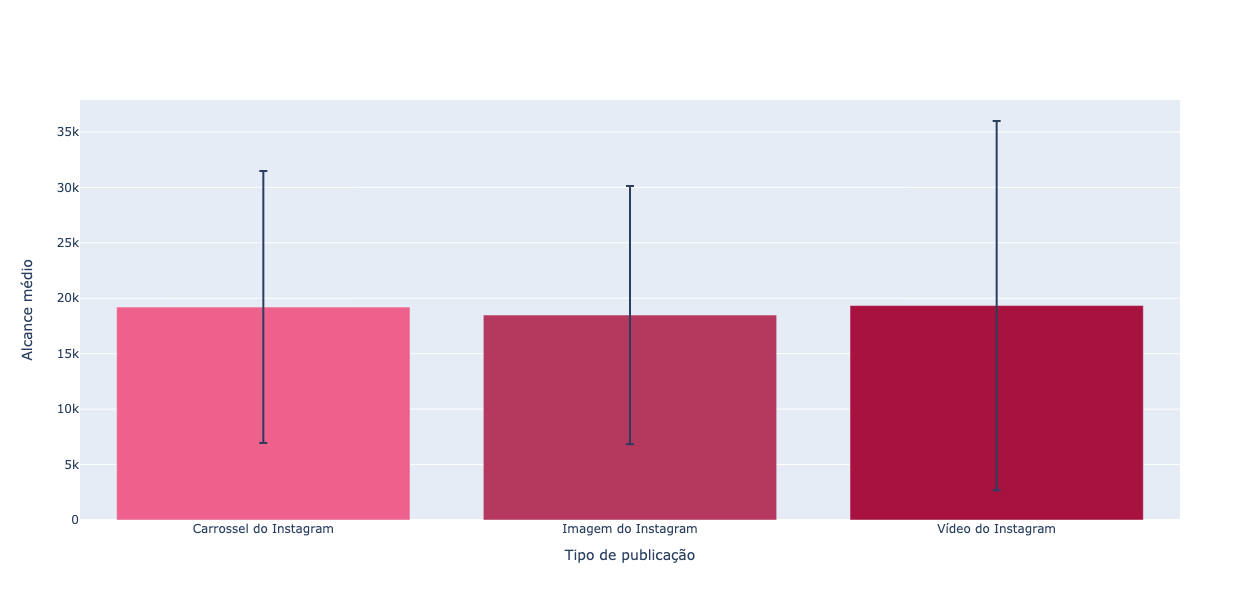

In [216]:
fig = go.Figure()

fig.add_trace(go.Bar(
    name='Control',
    x=df_aux['tipo_de_publicação'],
    y=df_aux['alcance médio'],
    error_y=dict(type='data', array=df_aux['Desvio padrão']),
    marker=dict(color=['#ED618C', '#B5385E','#A8123E'])  
))

fig.update_layout(
    barmode='group',
    width=1200,
    height=600,
    yaxis_title='Alcance médio',
    xaxis_title='Tipo de publicação'
)

fig.show()

In [217]:
df_aux2 = df[['tipo_de_publicação', 'curtidas']].groupby('tipo_de_publicação').agg({'curtidas':['mean','std']}).round()

df_aux2.columns = ['media de curtidas', 'Desvio padrão']

df_aux2 = df_aux2.reset_index()

df_aux2




tipo_de_publicação  media de curtidas  Desvio padrão
0  Carrossel do Instagram             1355.0         1323.0
1     Imagem do Instagram             1092.0          997.0
2      Vídeo do Instagram              929.0         1053.0

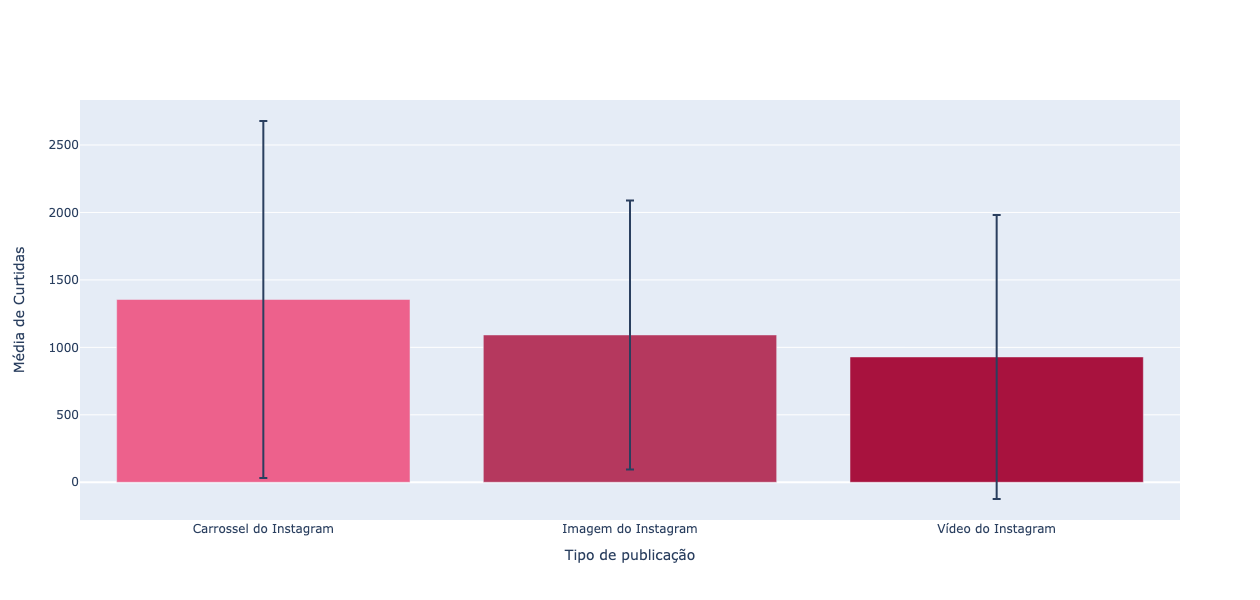

In [218]:
fig = go.Figure()

fig.add_trace(go.Bar(
    name='Control',
    x=df_aux2['tipo_de_publicação'],
    y=df_aux2['media de curtidas'],
    error_y=dict(type='data', array=df_aux2['Desvio padrão']),
    marker=dict(color=['#ED618C', '#B5385E','#A8123E'])  
))

fig.update_layout(
    barmode='group',
    width=1200,
    height=600,
    yaxis_title='Média de Curtidas',
    xaxis_title='Tipo de publicação'
)

fig.show()

In [219]:
df_aux3 = df[['tipo_de_publicação', 'compartilhamentos']].groupby('tipo_de_publicação').agg({'compartilhamentos':['mean','std']}).round()

df_aux3.columns = ['media de compartilhamento', 'Desvio padrão']

df_aux3 = df_aux3.reset_index()

df_aux3


tipo_de_publicação  media de compartilhamento  Desvio padrão
0  Carrossel do Instagram                      423.0          713.0
1     Imagem do Instagram                      227.0          352.0
2      Vídeo do Instagram                      210.0          353.0

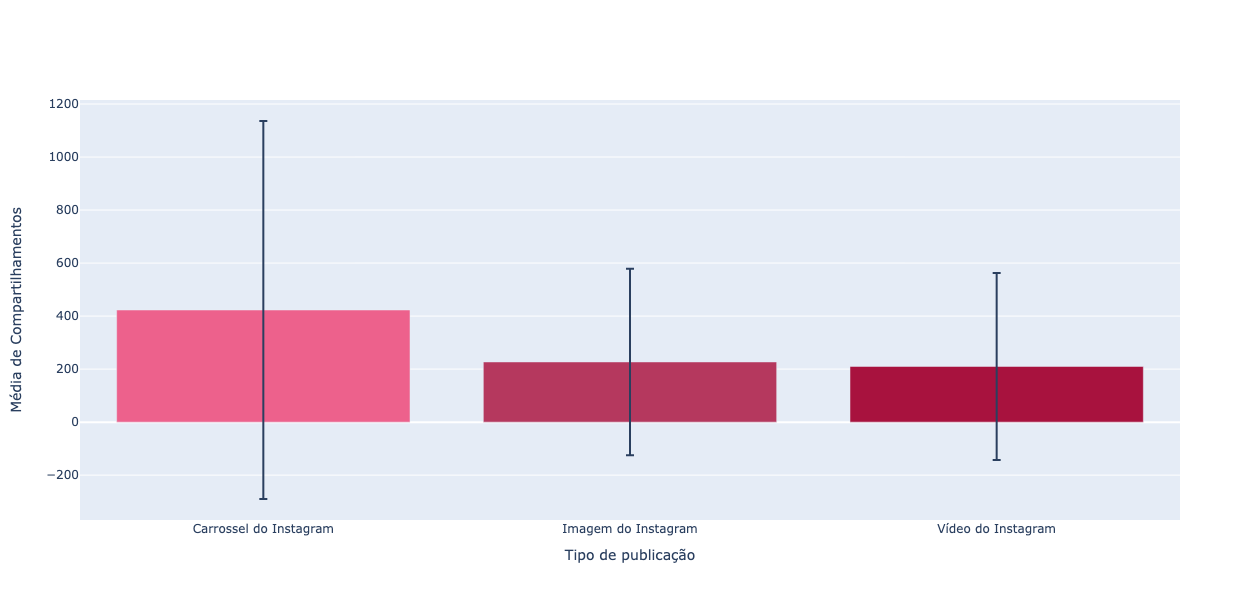

In [220]:
fig = go.Figure()

fig.add_trace(go.Bar(
    name='Control',
    x=df_aux3['tipo_de_publicação'],
    y=df_aux3['media de compartilhamento'],
    error_y=dict(type='data', array=df_aux3['Desvio padrão']),
    marker=dict(color=['#ED618C', '#B5385E','#A8123E'])  
))

fig.update_layout(
    barmode='group',
    width=1200,
    height=600,
    yaxis_title='Média de Compartilhamentos',
    xaxis_title='Tipo de publicação'
)

fig.show()

# Melhores e piores

## criando função para buscar os dados

In [221]:
def obter_dados(dataframe1, coluna_interesse1, extremo1, dataframe2, coluna_interesse2, extremo2, dataframe3, coluna_interesse3, extremo3, n=5):
    if extremo1 == 'maiores':
        df1 = dataframe1[['link_permanente', 'tipo_de_publicação', coluna_interesse1, 'data', 'horario']].nlargest(n, coluna_interesse1)
    elif extremo1 == 'menores':
        df1 = dataframe1[['link_permanente', 'tipo_de_publicação', coluna_interesse1, 'data', 'horario']].nsmallest(n, coluna_interesse1)
    else:
        raise ValueError("O argumento 'extremo1' deve ser 'maiores' ou 'menores'.")
    
    if extremo2 == 'maiores':
        df2 = dataframe2[['link_permanente', 'tipo_de_publicação', coluna_interesse2, 'data', 'horario']].nlargest(n, coluna_interesse2)
    elif extremo2 == 'menores':
        df2 = dataframe2[['link_permanente', 'tipo_de_publicação', coluna_interesse2, 'data', 'horario']].nsmallest(n, coluna_interesse2)
    else:
        raise ValueError("O argumento 'extremo2' deve ser 'maiores' ou 'menores'.")
    
    if extremo3 == 'maiores':
        df3 = dataframe3[['link_permanente', 'tipo_de_publicação', coluna_interesse3, 'data', 'horario']].nlargest(n, coluna_interesse3)
    elif extremo3 == 'menores':
        df3 = dataframe3[['link_permanente', 'tipo_de_publicação', coluna_interesse3, 'data', 'horario']].nsmallest(n, coluna_interesse3)
    else:
        raise ValueError("O argumento 'extremo3' deve ser 'maiores' ou 'menores'.")
    
    df_concatenado = pd.concat([df1, df2, df3], ignore_index=True)
    return df_concatenado

## Top 5 melhores/piores Alance por tipo de post 


In [222]:
df_melhor_alcance = obter_dados(df_carrossel,'alcance', 'maiores', df_post_unico, 'alcance', 'maiores', df_video, 'alcance', 'maiores')

df_melhor_alcance

link_permanente      tipo_de_publicação  \
0      https://www.instagram.com/p/Cm6lRXjs1Iv/  Carrossel do Instagram   
1      https://www.instagram.com/p/CjgaSc4uSrE/  Carrossel do Instagram   
2      https://www.instagram.com/p/Ci-5kKrueYj/  Carrossel do Instagram   
3      https://www.instagram.com/p/CktDxvTuGrk/  Carrossel do Instagram   
4      https://www.instagram.com/p/CpgINg2OdGT/  Carrossel do Instagram   
5      https://www.instagram.com/p/Cg2m85fhTej/     Imagem do Instagram   
6      https://www.instagram.com/p/CnXtrgTuc-r/     Imagem do Instagram   
7      https://www.instagram.com/p/ChalKb9rj_i/     Imagem do Instagram   
8      https://www.instagram.com/p/CafeTCHKGgJ/     Imagem do Instagram   
9      https://www.instagram.com/p/CYPb0Rnt3IN/     Imagem do Instagram   
10  https://www.instagram.com/reel/CpV6xY7Dzcw/      Vídeo do Instagram   
11  https://www.instagram.com/reel/CmfM8M9Kz05/      Vídeo do Instagram   
12  https://www.instagram.com/reel/CfXQi6mjpl1/      Vídeo do Instagram   
13  https://www.instagram.com/reel/Cp3TZyRD6tM/      Vídeo do Instagram   
14  https://www.instagram.com/reel/Co2LlTEjTYX/      Vídeo do Instagram   

    alcance        data horario  
0     87576  2023-01-02   06:01  
1     57917  2022-10-09   13:10  
2     56137  2022-09-26   13:09  
3     52409  2022-11-08   06:11  
4     52310  2023-03-07   13:03  
5     56945  2022-08-04   14:08  
6     56367  2023-01-13   13:01  
7     45750  2022-08-18   14:08  
8     42813  2022-02-27   11:02  
9     38360  2022-01-02   12:01  
10    66813  2023-03-03   13:03  
11    63949  2022-12-22   14:12  
12    48451  2022-06-28   14:06  
13    46191  2023-03-16   14:03  
14    45885  2023-02-19   06:02

In [223]:
df_pior_alcance = obter_dados(df_carrossel,'alcance', 'menores', df_post_unico, 'alcance', 'menores', df_video, 'alcance', 'menores')

df_pior_alcance

link_permanente      tipo_de_publicação  \
0      https://www.instagram.com/p/Cp5f-gfOhjw/  Carrossel do Instagram   
1      https://www.instagram.com/p/CpFTmKWMIER/  Carrossel do Instagram   
2      https://www.instagram.com/p/Co4ifO3Mura/  Carrossel do Instagram   
3      https://www.instagram.com/p/CfaBimoKWts/  Carrossel do Instagram   
4      https://www.instagram.com/p/Cp42d25O9a9/  Carrossel do Instagram   
5      https://www.instagram.com/p/CgEq2nLtR0-/     Imagem do Instagram   
6      https://www.instagram.com/p/CgIH7J3I355/     Imagem do Instagram   
7      https://www.instagram.com/p/CgfaZJIrA0P/     Imagem do Instagram   
8      https://www.instagram.com/p/Clj5ygpON3f/     Imagem do Instagram   
9      https://www.instagram.com/p/Cn4YWV6Jm7t/     Imagem do Instagram   
10     https://www.instagram.com/p/CfzjB_5M15B/      Vídeo do Instagram   
11     https://www.instagram.com/p/CgDE8f2Ibad/      Vídeo do Instagram   
12  https://www.instagram.com/reel/ClUmd_Mj1DD/      Vídeo do Instagram   
13  https://www.instagram.com/reel/CqYCkcrjara/      Vídeo do Instagram   
14  https://www.instagram.com/reel/ClhdiETDIN2/      Vídeo do Instagram   

    alcance        data horario  
0      2815  2023-03-17   10:03  
1      2967  2023-02-25   03:02  
2      3023  2023-02-20   04:02  
3      3334  2022-06-29   15:06  
4      3471  2023-03-17   04:03  
5      3968  2022-07-16   05:07  
6      4127  2022-07-17   13:07  
7      4165  2022-07-26   14:07  
8      4180  2022-11-29   14:11  
9      4408  2023-01-26   06:01  
10     3549  2022-07-09   13:07  
11     3996  2022-07-15   14:07  
12     4848  2022-11-23   15:11  
13     5273  2023-03-29   07:03  
14     5702  2022-11-28   15:11

## Top 5 melhores/piores Impressões por tipo de post 

In [224]:
df_melhor_impressao = obter_dados(df_carrossel,'impressões', 'maiores', df_post_unico, 'impressões', 'maiores', df_video, 'impressões', 'maiores')

df_melhor_impressao

link_permanente      tipo_de_publicação  \
0      https://www.instagram.com/p/Cm6lRXjs1Iv/  Carrossel do Instagram   
1      https://www.instagram.com/p/Ch0j3rFLUV8/  Carrossel do Instagram   
2      https://www.instagram.com/p/CjgaSc4uSrE/  Carrossel do Instagram   
3      https://www.instagram.com/p/CpgINg2OdGT/  Carrossel do Instagram   
4      https://www.instagram.com/p/CePP7Vusy8q/  Carrossel do Instagram   
5      https://www.instagram.com/p/Cg2m85fhTej/     Imagem do Instagram   
6      https://www.instagram.com/p/CnXtrgTuc-r/     Imagem do Instagram   
7      https://www.instagram.com/p/ChalKb9rj_i/     Imagem do Instagram   
8      https://www.instagram.com/p/CafeTCHKGgJ/     Imagem do Instagram   
9      https://www.instagram.com/p/CYPb0Rnt3IN/     Imagem do Instagram   
10  https://www.instagram.com/reel/CpV6xY7Dzcw/      Vídeo do Instagram   
11  https://www.instagram.com/reel/CmfM8M9Kz05/      Vídeo do Instagram   
12  https://www.instagram.com/reel/CfXQi6mjpl1/      Vídeo do Instagram   
13  https://www.instagram.com/reel/Cp3TZyRD6tM/      Vídeo do Instagram   
14  https://www.instagram.com/reel/Co2LlTEjTYX/      Vídeo do Instagram   

    impressões        data horario  
0       103140  2023-01-02   06:01  
1        97785  2022-08-28   16:08  
2        72948  2022-10-09   13:10  
3        71217  2023-03-07   13:03  
4        68723  2022-05-31   14:05  
5        63040  2022-08-04   14:08  
6        58152  2023-01-13   13:01  
7        50745  2022-08-18   14:08  
8        45463  2022-02-27   11:02  
9        41786  2022-01-02   12:01  
10       69757  2023-03-03   13:03  
11       68110  2022-12-22   14:12  
12       53464  2022-06-28   14:06  
13       52728  2023-03-16   14:03  
14       49362  2023-02-19   06:02

In [225]:
df_pior_impressao = obter_dados(df_carrossel,'impressões', 'menores', df_post_unico, 'impressões', 'menores', df_video, 'impressões', 'menores')

df_pior_impressao

link_permanente      tipo_de_publicação  \
0      https://www.instagram.com/p/Cp5f-gfOhjw/  Carrossel do Instagram   
1      https://www.instagram.com/p/CpFTmKWMIER/  Carrossel do Instagram   
2      https://www.instagram.com/p/Co4ifO3Mura/  Carrossel do Instagram   
3      https://www.instagram.com/p/Cp5yNPrOipH/  Carrossel do Instagram   
4      https://www.instagram.com/p/CfaBimoKWts/  Carrossel do Instagram   
5      https://www.instagram.com/p/Clj5ygpON3f/     Imagem do Instagram   
6      https://www.instagram.com/p/CgEq2nLtR0-/     Imagem do Instagram   
7      https://www.instagram.com/p/CgIH7J3I355/     Imagem do Instagram   
8      https://www.instagram.com/p/Cn4YWV6Jm7t/     Imagem do Instagram   
9      https://www.instagram.com/p/CgfaZJIrA0P/     Imagem do Instagram   
10     https://www.instagram.com/p/CfzjB_5M15B/      Vídeo do Instagram   
11     https://www.instagram.com/p/CgDE8f2Ibad/      Vídeo do Instagram   
12  https://www.instagram.com/reel/ClUmd_Mj1DD/      Vídeo do Instagram   
13  https://www.instagram.com/reel/CqYCkcrjara/      Vídeo do Instagram   
14  https://www.instagram.com/reel/ClhdiETDIN2/      Vídeo do Instagram   

    impressões        data horario  
0         3519  2023-03-17   10:03  
1         3807  2023-02-25   03:02  
2         3977  2023-02-20   04:02  
3         4247  2023-03-17   13:03  
4         4257  2022-06-29   15:06  
5         4608  2022-11-29   14:11  
6         4646  2022-07-16   05:07  
7         4708  2022-07-17   13:07  
8         4820  2023-01-26   06:01  
9         5031  2022-07-26   14:07  
10        4214  2022-07-09   13:07  
11        4569  2022-07-15   14:07  
12        5352  2022-11-23   15:11  
13        5881  2023-03-29   07:03  
14        6086  2022-11-28   15:11

## Top 5 melhores/piores Compartilhamentos por tipo de post 


In [226]:
df_melhor_compart = obter_dados(df_carrossel,'compartilhamentos', 'maiores', df_post_unico, 'compartilhamentos', 'maiores',
                                df_video, 'compartilhamentos', 'maiores')

df_melhor_compart

link_permanente      tipo_de_publicação  \
0      https://www.instagram.com/p/Ch0j3rFLUV8/  Carrossel do Instagram   
1      https://www.instagram.com/p/CgrZhiCACDL/  Carrossel do Instagram   
2      https://www.instagram.com/p/CfCoG1kvcpH/  Carrossel do Instagram   
3      https://www.instagram.com/p/ChNB8otB5iE/  Carrossel do Instagram   
4      https://www.instagram.com/p/CeJUcmWPf9L/  Carrossel do Instagram   
5      https://www.instagram.com/p/Cg2m85fhTej/     Imagem do Instagram   
6      https://www.instagram.com/p/ChalKb9rj_i/     Imagem do Instagram   
7      https://www.instagram.com/p/CdyG7vphuC5/     Imagem do Instagram   
8      https://www.instagram.com/p/CnXtrgTuc-r/     Imagem do Instagram   
9      https://www.instagram.com/p/CZAYqUqMKvw/     Imagem do Instagram   
10     https://www.instagram.com/p/Cdt6x8Mtvlr/      Vídeo do Instagram   
11  https://www.instagram.com/reel/CokKRn1jy2O/      Vídeo do Instagram   
12  https://www.instagram.com/reel/CmfM8M9Kz05/      Vídeo do Instagram   
13  https://www.instagram.com/reel/CnCVnJkqTDp/      Vídeo do Instagram   
14  https://www.instagram.com/reel/Cp3TZyRD6tM/      Vídeo do Instagram   

    compartilhamentos        data horario  
0                5214  2022-08-28   16:08  
1                4305  2022-07-31   06:07  
2                4007  2022-06-20   13:06  
3                3529  2022-08-13   07:08  
4                3342  2022-05-29   07:05  
5                1954  2022-08-04   14:08  
6                1753  2022-08-18   14:08  
7                1669  2022-05-20   07:05  
8                1199  2023-01-13   13:01  
9                 844  2022-01-21   12:01  
10               1561  2022-05-18   16:05  
11               1064  2023-02-12   06:02  
12               1031  2022-12-22   14:12  
13                803  2023-01-05   06:01  
14                731  2023-03-16   14:03

In [227]:
df_pior_compart = obter_dados(df_carrossel,'compartilhamentos', 'menores', df_post_unico, 'compartilhamentos', 'menores',
                           df_video, 'compartilhamentos', 'menores')


df_pior_compart

link_permanente      tipo_de_publicação  \
0      https://www.instagram.com/p/Cewm11puQaP/  Carrossel do Instagram   
1      https://www.instagram.com/p/Ce8kb6ftlxR/  Carrossel do Instagram   
2      https://www.instagram.com/p/CeMsM7FLXUF/  Carrossel do Instagram   
3      https://www.instagram.com/p/Ce9f_dlIIt6/  Carrossel do Instagram   
4      https://www.instagram.com/p/Co4ifO3Mura/  Carrossel do Instagram   
5      https://www.instagram.com/p/CgEq2nLtR0-/     Imagem do Instagram   
6      https://www.instagram.com/p/Clj5ygpON3f/     Imagem do Instagram   
7      https://www.instagram.com/p/Cb8bYtQOANF/     Imagem do Instagram   
8      https://www.instagram.com/p/CgfaZJIrA0P/     Imagem do Instagram   
9      https://www.instagram.com/p/CeWRrkkONeu/     Imagem do Instagram   
10  https://www.instagram.com/reel/Ckbw6skjkAz/      Vídeo do Instagram   
11     https://www.instagram.com/p/CfzjB_5M15B/      Vídeo do Instagram   
12     https://www.instagram.com/p/CgDE8f2Ibad/      Vídeo do Instagram   
13  https://www.instagram.com/reel/ClUmd_Mj1DD/      Vídeo do Instagram   
14  https://www.instagram.com/reel/CghWJ32jodW/      Vídeo do Instagram   

    compartilhamentos        data horario  
0                   0  2022-06-13   13:06  
1                   0  2022-06-18   05:06  
2                   1  2022-05-30   15:05  
3                   1  2022-06-18   14:06  
4                   1  2023-02-20   04:02  
5                   0  2022-07-16   05:07  
6                   0  2022-11-29   14:11  
7                   2  2022-04-04   14:04  
8                   2  2022-07-26   14:07  
9                   4  2022-06-03   08:06  
10                  1  2022-11-01   14:11  
11                  5  2022-07-09   13:07  
12                  5  2022-07-15   14:07  
13                  5  2022-11-23   15:11  
14                  7  2022-07-27   08:07

## top 5 melhores/piores Curtidas por tipo de post


In [228]:
df_melhor_curtida = obter_dados(df_carrossel,'curtidas', 'maiores', df_post_unico, 'curtidas', 'maiores', df_video, 'curtidas', 'maiores')

df_melhor_curtida

link_permanente      tipo_de_publicação  \
0      https://www.instagram.com/p/CgrZhiCACDL/  Carrossel do Instagram   
1      https://www.instagram.com/p/CjgaSc4uSrE/  Carrossel do Instagram   
2      https://www.instagram.com/p/CfSGVsRI0XN/  Carrossel do Instagram   
3      https://www.instagram.com/p/CdlPuY4Nai_/  Carrossel do Instagram   
4      https://www.instagram.com/p/Cdy6ErjByn3/  Carrossel do Instagram   
5      https://www.instagram.com/p/Cg2m85fhTej/     Imagem do Instagram   
6      https://www.instagram.com/p/CnhorTQO_7u/     Imagem do Instagram   
7      https://www.instagram.com/p/CnXtrgTuc-r/     Imagem do Instagram   
8      https://www.instagram.com/p/CZFWOcGsXFu/     Imagem do Instagram   
9      https://www.instagram.com/p/CdyG7vphuC5/     Imagem do Instagram   
10  https://www.instagram.com/reel/CmfM8M9Kz05/      Vídeo do Instagram   
11  https://www.instagram.com/reel/Cp3TZyRD6tM/      Vídeo do Instagram   
12  https://www.instagram.com/reel/CpV6xY7Dzcw/      Vídeo do Instagram   
13  https://www.instagram.com/reel/ChAQYkDjIjT/      Vídeo do Instagram   
14  https://www.instagram.com/reel/CokKRn1jy2O/      Vídeo do Instagram   

    curtidas        data horario  
0       7376  2022-07-31   06:07  
1       6240  2022-10-09   13:10  
2       5958  2022-06-26   14:06  
3       5727  2022-05-15   07:05  
4       5478  2022-05-20   14:05  
5       4788  2022-08-04   14:08  
6       4044  2023-01-17   10:01  
7       4037  2023-01-13   13:01  
8       3407  2022-01-23   11:01  
9       3088  2022-05-20   07:05  
10      3865  2022-12-22   14:12  
11      3201  2023-03-16   14:03  
12      2852  2023-03-03   13:03  
13      2725  2022-08-08   08:08  
14      2696  2023-02-12   06:02

In [229]:
df_pior_curtida = obter_dados(df_carrossel,'curtidas', 'menores', df_post_unico, 'curtidas', 'menores', df_video, 'curtidas', 'menores')


df_pior_curtida

link_permanente      tipo_de_publicação  \
0      https://www.instagram.com/p/CpFTmKWMIER/  Carrossel do Instagram   
1      https://www.instagram.com/p/CmUFHH4uraw/  Carrossel do Instagram   
2      https://www.instagram.com/p/Co4ifO3Mura/  Carrossel do Instagram   
3      https://www.instagram.com/p/CfaBimoKWts/  Carrossel do Instagram   
4      https://www.instagram.com/p/Cfe9nwEoGvC/  Carrossel do Instagram   
5      https://www.instagram.com/p/CgEq2nLtR0-/     Imagem do Instagram   
6      https://www.instagram.com/p/Clj5ygpON3f/     Imagem do Instagram   
7      https://www.instagram.com/p/CgfaZJIrA0P/     Imagem do Instagram   
8      https://www.instagram.com/p/CgIH7J3I355/     Imagem do Instagram   
9      https://www.instagram.com/p/Cb8bYtQOANF/     Imagem do Instagram   
10     https://www.instagram.com/p/CfzjB_5M15B/      Vídeo do Instagram   
11  https://www.instagram.com/reel/CjRbG_QDqXg/      Vídeo do Instagram   
12     https://www.instagram.com/p/CgDE8f2Ibad/      Vídeo do Instagram   
13     https://www.instagram.com/p/CdeSC23u516/      Vídeo do Instagram   
14  https://www.instagram.com/reel/ClUmd_Mj1DD/      Vídeo do Instagram   

    curtidas        data horario  
0         27  2023-02-25   03:02  
1         34  2022-12-18   07:12  
2         34  2023-02-20   04:02  
3         40  2022-06-29   15:06  
4         46  2022-07-01   13:07  
5         34  2022-07-16   05:07  
6         34  2022-11-29   14:11  
7         47  2022-07-26   14:07  
8         59  2022-07-17   13:07  
9         63  2022-04-04   14:04  
10        44  2022-07-09   13:07  
11        53  2022-10-03   17:10  
12        54  2022-07-15   14:07  
13        71  2022-05-12   14:05  
14        95  2022-11-23   15:11

## Top 5 melhores/piores Comentarios por tipo de post

In [230]:
df_melhor_coment = obter_dados(df_carrossel,'comentários', 'maiores', df_post_unico, 'comentários', 'maiores', df_video, 'comentários', 'maiores')

df_melhor_coment

link_permanente      tipo_de_publicação  \
0      https://www.instagram.com/p/CktDxvTuGrk/  Carrossel do Instagram   
1      https://www.instagram.com/p/CeBSDv7ppz7/  Carrossel do Instagram   
2      https://www.instagram.com/p/CfCoG1kvcpH/  Carrossel do Instagram   
3      https://www.instagram.com/p/CmonI7Gs4E-/  Carrossel do Instagram   
4      https://www.instagram.com/p/Cp0rJACIJID/  Carrossel do Instagram   
5      https://www.instagram.com/p/Cp5K9k7uCEd/     Imagem do Instagram   
6      https://www.instagram.com/p/Ca0XJesuYNv/     Imagem do Instagram   
7      https://www.instagram.com/p/CdyG7vphuC5/     Imagem do Instagram   
8      https://www.instagram.com/p/CYUkhXqIaug/     Imagem do Instagram   
9      https://www.instagram.com/p/CnhorTQO_7u/     Imagem do Instagram   
10  https://www.instagram.com/reel/ChAQYkDjIjT/      Vídeo do Instagram   
11  https://www.instagram.com/reel/Ckvpl8_jzRf/      Vídeo do Instagram   
12  https://www.instagram.com/reel/CokKRn1jy2O/      Vídeo do Instagram   
13  https://www.instagram.com/reel/Co2LlTEjTYX/      Vídeo do Instagram   
14  https://www.instagram.com/reel/Cp3TZyRD6tM/      Vídeo do Instagram   

    comentários        data horario  
0           398  2022-11-08   06:11  
1           384  2022-05-26   04:05  
2           192  2022-06-20   13:06  
3           140  2022-12-26   06:12  
4           138  2023-03-15   13:03  
5           738  2023-03-17   07:03  
6           725  2022-03-07   13:03  
7           176  2022-05-20   07:05  
8           155  2022-01-04   12:01  
9           149  2023-01-17   10:01  
10           65  2022-08-08   08:08  
11           61  2022-11-09   07:11  
12           50  2023-02-12   06:02  
13           46  2023-02-19   06:02  
14           43  2023-03-16   14:03

In [231]:
df_pior_coment = obter_dados(df_carrossel,'comentários', 'menores', df_post_unico, 'comentários', 'menores', df_video, 'comentários', 'menores')

df_pior_coment

link_permanente      tipo_de_publicação  \
0      https://www.instagram.com/p/Ca0L8Pps-aP/  Carrossel do Instagram   
1      https://www.instagram.com/p/CcxtvQdtzvr/  Carrossel do Instagram   
2      https://www.instagram.com/p/CeZaXUVr9YB/  Carrossel do Instagram   
3      https://www.instagram.com/p/Ce1CFptpavp/  Carrossel do Instagram   
4      https://www.instagram.com/p/Ce8v-Myjb62/  Carrossel do Instagram   
5      https://www.instagram.com/p/CctTcgUIs_U/     Imagem do Instagram   
6      https://www.instagram.com/p/CdBOkWIr3tL/     Imagem do Instagram   
7      https://www.instagram.com/p/CfWh8B5OAPt/     Imagem do Instagram   
8      https://www.instagram.com/p/CgCyPvphXRq/     Imagem do Instagram   
9      https://www.instagram.com/p/CgEq2nLtR0-/     Imagem do Instagram   
10     https://www.instagram.com/p/CfzjB_5M15B/      Vídeo do Instagram   
11     https://www.instagram.com/p/CgDE8f2Ibad/      Vídeo do Instagram   
12  https://www.instagram.com/reel/ClZQp_ND7AV/      Vídeo do Instagram   
13  https://www.instagram.com/reel/ClhdiETDIN2/      Vídeo do Instagram   
14  https://www.instagram.com/reel/ClUmd_Mj1DD/      Vídeo do Instagram   

    comentários        data horario  
0             0  2022-03-07   12:03  
1             0  2022-04-25   07:04  
2             0  2022-06-04   13:06  
3             0  2022-06-15   07:06  
4             0  2022-06-18   07:06  
5             0  2022-04-23   14:04  
6             0  2022-05-01   07:05  
7             0  2022-06-28   07:06  
8             0  2022-07-15   11:07  
9             0  2022-07-16   05:07  
10            0  2022-07-09   13:07  
11            0  2022-07-15   14:07  
12            0  2022-11-25   10:11  
13            0  2022-11-28   15:11  
14            1  2022-11-23   15:11

## Top 5 melhores/piores Salvamentos por tipo de post 


In [232]:
df_melhor_salvamento = obter_dados(df_carrossel,'salvamentos', 'maiores', df_post_unico, 'salvamentos', 'maiores', df_video, 'salvamentos', 'maiores')

df_melhor_salvamento

link_permanente      tipo_de_publicação  \
0      https://www.instagram.com/p/CePP7Vusy8q/  Carrossel do Instagram   
1      https://www.instagram.com/p/Cih0zqRvDlN/  Carrossel do Instagram   
2      https://www.instagram.com/p/Cm6lRXjs1Iv/  Carrossel do Instagram   
3      https://www.instagram.com/p/Cdy6ErjByn3/  Carrossel do Instagram   
4      https://www.instagram.com/p/CmM4KxjLM4u/  Carrossel do Instagram   
5      https://www.instagram.com/p/Cg2m85fhTej/     Imagem do Instagram   
6      https://www.instagram.com/p/ChalKb9rj_i/     Imagem do Instagram   
7      https://www.instagram.com/p/CZAYqUqMKvw/     Imagem do Instagram   
8      https://www.instagram.com/p/CoM-tZBLcMM/     Imagem do Instagram   
9      https://www.instagram.com/p/CqYq1PNvPUR/     Imagem do Instagram   
10  https://www.instagram.com/reel/Cp3TZyRD6tM/      Vídeo do Instagram   
11  https://www.instagram.com/reel/CmfM8M9Kz05/      Vídeo do Instagram   
12  https://www.instagram.com/reel/Co2LlTEjTYX/      Vídeo do Instagram   
13  https://www.instagram.com/reel/CqETJ5ZDBzf/      Vídeo do Instagram   
14  https://www.instagram.com/reel/CfXQi6mjpl1/      Vídeo do Instagram   

    salvamentos        data horario  
0          3316  2022-05-31   14:05  
1          2501  2022-09-15   06:09  
2          2087  2023-01-02   06:01  
3          1657  2022-05-20   14:05  
4          1212  2022-12-15   12:12  
5          1034  2022-08-04   14:08  
6           604  2022-08-18   14:08  
7           459  2022-01-21   12:01  
8           290  2023-02-03   06:02  
9           276  2023-03-29   13:03  
10         1943  2023-03-16   14:03  
11         1497  2022-12-22   14:12  
12         1377  2023-02-19   06:02  
13         1355  2023-03-21   15:03  
14          860  2022-06-28   14:06

In [233]:
df_pior_salvamento = obter_dados(df_carrossel,'salvamentos', 'menores', df_post_unico, 'salvamentos', 'menores', df_video, 'salvamentos', 'menores')

df_pior_salvamento

link_permanente      tipo_de_publicação  \
0      https://www.instagram.com/p/Cp42d25O9a9/  Carrossel do Instagram   
1      https://www.instagram.com/p/CfPkGpWvH_h/  Carrossel do Instagram   
2      https://www.instagram.com/p/Co4ifO3Mura/  Carrossel do Instagram   
3      https://www.instagram.com/p/CpFTmKWMIER/  Carrossel do Instagram   
4      https://www.instagram.com/p/Cox_pB5NQRm/  Carrossel do Instagram   
5      https://www.instagram.com/p/CgEq2nLtR0-/     Imagem do Instagram   
6      https://www.instagram.com/p/Cba88WQOkvR/     Imagem do Instagram   
7      https://www.instagram.com/p/CeWRrkkONeu/     Imagem do Instagram   
8      https://www.instagram.com/p/CiLZ_FYOKcY/     Imagem do Instagram   
9      https://www.instagram.com/p/CiLaOnrOSyJ/     Imagem do Instagram   
10     https://www.instagram.com/p/CgDE8f2Ibad/      Vídeo do Instagram   
11     https://www.instagram.com/p/CfzjB_5M15B/      Vídeo do Instagram   
12  https://www.instagram.com/reel/CqYCkcrjara/      Vídeo do Instagram   
13  https://www.instagram.com/reel/CinP4vtjyYQ/      Vídeo do Instagram   
14  https://www.instagram.com/reel/CjRbG_QDqXg/      Vídeo do Instagram   

    salvamentos        data horario  
0             0  2023-03-17   04:03  
1             1  2022-06-25   14:06  
2             1  2023-02-20   04:02  
3             1  2023-02-25   03:02  
4             2  2023-02-17   15:02  
5             0  2022-07-16   05:07  
6             2  2022-03-22   14:03  
7             3  2022-06-03   08:06  
8             4  2022-09-06   13:09  
9             4  2022-09-06   13:09  
10            1  2022-07-15   14:07  
11            3  2022-07-09   13:07  
12            3  2023-03-29   07:03  
13            4  2022-09-17   08:09  
14            5  2022-10-03   17:10

## Top 5 melhores/piores Seguimentos por tipo de post

In [234]:
df_melhor_seguimento = obter_dados(df_carrossel,'seguimentos', 'maiores', df_post_unico, 'seguimentos', 'maiores', df_video, 'seguimentos', 'maiores')

df_melhor_seguimento

link_permanente      tipo_de_publicação  \
0      https://www.instagram.com/p/Cm6lRXjs1Iv/  Carrossel do Instagram   
1      https://www.instagram.com/p/Cdy6ErjByn3/  Carrossel do Instagram   
2      https://www.instagram.com/p/CjgaSc4uSrE/  Carrossel do Instagram   
3      https://www.instagram.com/p/Cm6l2ALsME3/  Carrossel do Instagram   
4      https://www.instagram.com/p/CePP7Vusy8q/  Carrossel do Instagram   
5      https://www.instagram.com/p/Cg2m85fhTej/     Imagem do Instagram   
6      https://www.instagram.com/p/CfruCBAOdHx/     Imagem do Instagram   
7      https://www.instagram.com/p/CaAwmBRvXSc/     Imagem do Instagram   
8      https://www.instagram.com/p/CZMju-lM-Vl/     Imagem do Instagram   
9      https://www.instagram.com/p/Ca0XJesuYNv/     Imagem do Instagram   
10  https://www.instagram.com/reel/CmfM8M9Kz05/      Vídeo do Instagram   
11     https://www.instagram.com/p/Cdt6x8Mtvlr/      Vídeo do Instagram   
12  https://www.instagram.com/reel/CfXQi6mjpl1/      Vídeo do Instagram   
13  https://www.instagram.com/reel/CgvBASJDZDR/      Vídeo do Instagram   
14  https://www.instagram.com/reel/Cj0fWmXD5TG/      Vídeo do Instagram   

    seguimentos        data horario  
0           688  2023-01-02   06:01  
1           445  2022-05-20   14:05  
2           379  2022-10-09   13:10  
3           276  2023-01-02   06:01  
4           228  2022-05-31   14:05  
5           118  2022-08-04   14:08  
6            58  2022-07-06   12:07  
7            57  2022-02-15   12:02  
8            42  2022-01-26   06:01  
9            40  2022-03-07   13:03  
10          253  2022-12-22   14:12  
11           30  2022-05-18   16:05  
12           30  2022-06-28   14:06  
13           28  2022-08-01   16:08  
14           24  2022-10-17   08:10

In [235]:
df_pior_seguimento = obter_dados(df_carrossel,'seguimentos', 'menores', df_post_unico, 'seguimentos', 'menores', df_video, 'seguimentos', 'menores')

df_pior_seguimento

link_permanente      tipo_de_publicação  \
0      https://www.instagram.com/p/Cc6JwgArmQM/  Carrossel do Instagram   
1      https://www.instagram.com/p/CeEvBtWhaD0/  Carrossel do Instagram   
2      https://www.instagram.com/p/CeMsM7FLXUF/  Carrossel do Instagram   
3      https://www.instagram.com/p/CeYw6-htijA/  Carrossel do Instagram   
4      https://www.instagram.com/p/Cewm11puQaP/  Carrossel do Instagram   
5      https://www.instagram.com/p/CctTcgUIs_U/     Imagem do Instagram   
6      https://www.instagram.com/p/Cdn8zMFuGdO/     Imagem do Instagram   
7      https://www.instagram.com/p/Cd8ZfHNKISw/     Imagem do Instagram   
8      https://www.instagram.com/p/CeOkJkBNQAr/     Imagem do Instagram   
9      https://www.instagram.com/p/CeWRrkkONeu/     Imagem do Instagram   
10     https://www.instagram.com/p/CebQ2dfLurf/      Vídeo do Instagram   
11     https://www.instagram.com/p/CeoLr-PNMje/      Vídeo do Instagram   
12  https://www.instagram.com/reel/CfHxOfMDQYZ/      Vídeo do Instagram   
13  https://www.instagram.com/reel/ChvY7X0DDKT/      Vídeo do Instagram   
14  https://www.instagram.com/reel/CoXGOucDVAF/      Vídeo do Instagram   

    seguimentos        data horario  
0             0  2022-04-28   13:04  
1             0  2022-05-27   12:05  
2             0  2022-05-30   15:05  
3             0  2022-06-04   07:06  
4             0  2022-06-13   13:06  
5             0  2022-04-23   14:04  
6             0  2022-05-16   08:05  
7             0  2022-05-24   07:05  
8             0  2022-05-31   08:05  
9             0  2022-06-03   08:06  
10            0  2022-06-05   06:06  
11            0  2022-06-10   07:06  
12            0  2022-06-22   13:06  
13            0  2022-08-26   16:08  
14            0  2023-02-07   04:02

In [236]:
df

link_permanente      tipo_de_publicação  \
0    https://www.instagram.com/p/CYUGkszrE_f/  Carrossel do Instagram   
1    https://www.instagram.com/p/CYUkhXqIaug/     Imagem do Instagram   
2    https://www.instagram.com/p/CYWOHpDp69f/  Carrossel do Instagram   
3    https://www.instagram.com/p/CYcTudxJjyi/  Carrossel do Instagram   
4    https://www.instagram.com/p/CYe6S3uLaVl/     Imagem do Instagram   
..                                        ...                     ...   
516  https://www.instagram.com/p/CqYq1PNvPUR/     Imagem do Instagram   
517  https://www.instagram.com/p/CqatTNBhoTL/  Carrossel do Instagram   
518  https://www.instagram.com/p/CqdxHfROYDi/  Carrossel do Instagram   
519  https://www.instagram.com/p/Cqd7SLmPWc7/     Imagem do Instagram   
520  https://www.instagram.com/p/Cm4AeskoCQR/  Carrossel do Instagram   

     impressões  alcance  compartilhamentos  seguimentos  curtidas  \
0         12277    10268                 59            6       553   
1         32603    30742                433            4      1337   
2         31335    26389                916          144      2597   
3         49411    39667                256           40      3345   
4         28463    26410                 66           18      1025   
..          ...      ...                ...          ...       ...   
516       19543    18265                585           31      1995   
517       41547    33361                379            7      1603   
518       28281    22434                373           18      1626   
519       10503     9541                 40            0       502   
520       15778    13104                 29            4       497   

     comentários  salvamentos        data horario  
0              1           51  2022-01-04   08:01  
1            155           60  2022-01-04   12:01  
2             53          393  2022-01-05   03:01  
3             17          695  2022-01-07   12:01  
4             19           78  2022-01-08   12:01  
..           ...          ...         ...     ...  
516           36          276  2023-03-29   13:03  
517           30          989  2023-03-30   08:03  
518           46          288  2023-03-31   12:03  
519            1           71  2023-03-31   14:03  
520            0           45  2023-01-01   06:01  

[521 rows x 11 columns]

In [238]:
a = df['curtidas'].mean().round(2)

b = df['alcance'].mean().round(2)


In [245]:
a/b *100

1.9272652191958277

In [244]:
a = df['compartilhamentos'].mean().round(2)

b = df['alcance'].mean().round(2)